170498071/170498071 [==============================] - 14s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        1520      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 40)        20040     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 40)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                      

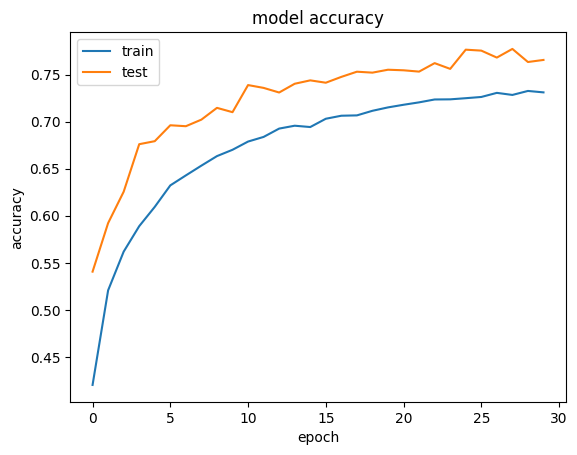

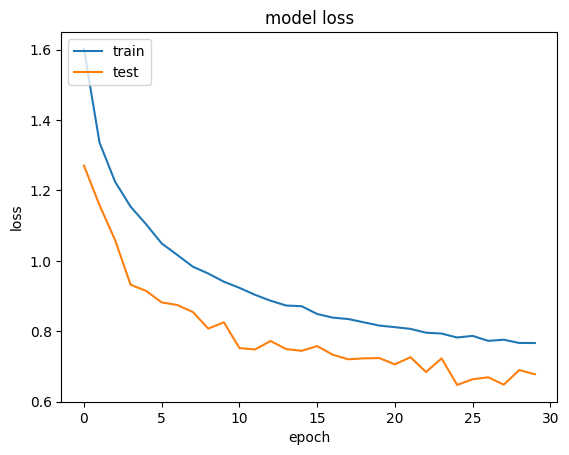

313/313 - 1s - loss: 0.6776 - accuracy: 0.7655 - 808ms/epoch - 3ms/step
Test loss: 0.6776025295257568
Test accuracy: 0.765500009059906


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def impHistoria(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

batch_size = 100
num_classes = 10
epochs = 30

nl, nc = 32, 32
(ax, ay), (qx, qy) = cifar10.load_data()

input_shape = (nl, nc, 3)

ax = ax.astype('float32')
ax /= 255
ax -= 0.5

qx = qx.astype('float32')
qx /= 255
qx -= 0.5

ay = keras.utils.to_categorical(ay, num_classes)
qy = keras.utils.to_categorical(qy, num_classes)

model = Sequential()
model.add(Conv2D(20, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

opt = optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

history = model.fit(
    datagen.flow(ax, ay, batch_size=batch_size),
    steps_per_epoch=ax.shape[0] // batch_size,
    epochs=epochs,
    verbose=2,
    validation_data=(qx, qy)
)

impHistoria(history)

score = model.evaluate(qx, qy, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('cnn1_with_augmentation.h5')

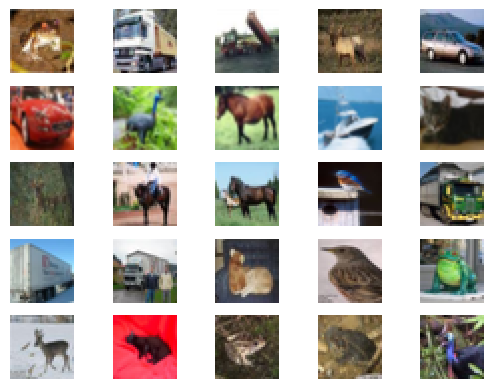

In [ ]:
#visualiza_cifar10.py
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt; import numpy as np

nl, nc = 32,32
(ax, ay), (qx, qy) = cifar10.load_data()

for l in range(5):
  for c in range(5):
    i=5*l+c
    plt.subplot(5, 5, i+1)
    image = ax[i,:,:,:]
    plt.imshow(image)
    plt.axis("off")
plt.show()